# Import Libraries

In [18]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load and Check Data

In [19]:
df = pd.read_csv("goal07.accessabsolute.csv")

## Veri Setini İnceleme

In [20]:
def check_df(dataframe):
    print("##################### Shape #####################") # kaça kaçlık matris olduğunu döner.
    print(dataframe.shape)
    print("\n##################### Columns #####################") # sütun isimlerini liste halinde döner.
    print(dataframe.columns)
    print("\n##################### Info #####################") # sütunların hangi veri tipinden olduğunu söyler.
    dataframe.info()
    print("##################### Types #####################") # satırların hangi veri tipinden olduğunu söyler.
    print(dataframe.dtypes)
    print("##################### Head #####################") # ilk indexten itibaren içine yazılan n değeri kadar satır döner. deafult değeri n=5’tir.
    print(dataframe.head())
    print("##################### Tail #####################") # head() fonksiyonunun kuyruk tarafında çalışan hali.
    print(dataframe.tail())
    print("##################### NA #####################") # null değerlerin toplamı.
    print(dataframe.isnull().sum())
    print("\n##################### Sample #####################") # Verisetinde bulunan verilere ilişkin bir örnek görmek istediğiniz zaman bu fonksiyonu çalıştırabilirsiniz, default değeri n=5'tir.
    print(dataframe.sample())

In [21]:
check_df(df) 

##################### Shape #####################
(132, 4)

##################### Columns #####################
Index(['iso3c', 'date', 'pop_without_urb', 'pop_without_rur'], dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   iso3c            132 non-null    object
 1   date             132 non-null    int64 
 2   pop_without_urb  132 non-null    int64 
 3   pop_without_rur  132 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.3+ KB
##################### Types #####################
iso3c              object
date                int64
pop_without_urb     int64
pop_without_rur     int64
dtype: object
##################### Head #####################
  iso3c  date  pop_without_urb  pop_without_rur
0   EAS  2000         11949032        148137720
1   EAS  2001         

### Veri Setinin Temel İstatistiksel Özelliklerinin İncelenmesi

In [22]:
df.describe() 

,date,pop_without_urb,pop_without_rur
count,132.000,132.000,132.000
mean,2010.500,22760355.561,150601422.455
std,6.368,34243646.892,191767473.582
min,2000.000,120554.000,37100.000
25%,2005.000,2375455.000,11696966.000
50%,2010.500,4963277.500,32793414.500
75%,2016.000,25014390.250,353746170.000
max,2021.000,107953816.000,540951131.000


# Variable Description

- iso3c = ISO3C is a shorthand for "ISO 3166-1 alpha-3," which is a three-letter country code used for standardization.
- date = The date or time period for which the data is collected.
- pop_without_urb = The population without access to electricity in urban areas.
- pop_without_rur = The population without access to electricity in rural areas.

# Univarite Variable Analysis

In [23]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['iso3c']

##################### Numeric #####################
['date', 'pop_without_urb', 'pop_without_rur']

##################### Categoric But Cardinal #####################
[]

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 132
Variables: 4
cat_cols: 1
num_cols: 3
cat_but_car: 0
num_but_cat: 0


# Kategorik ve Sayısal Değişkenlerin Görselleştirilmesi

             iso3c  Ratio
iso3c                    
EAS             22 16.667
LCN             22 16.667
MEA             22 16.667
RESTOFWORLD     22 16.667
SAS             22 16.667
SSF             22 16.667


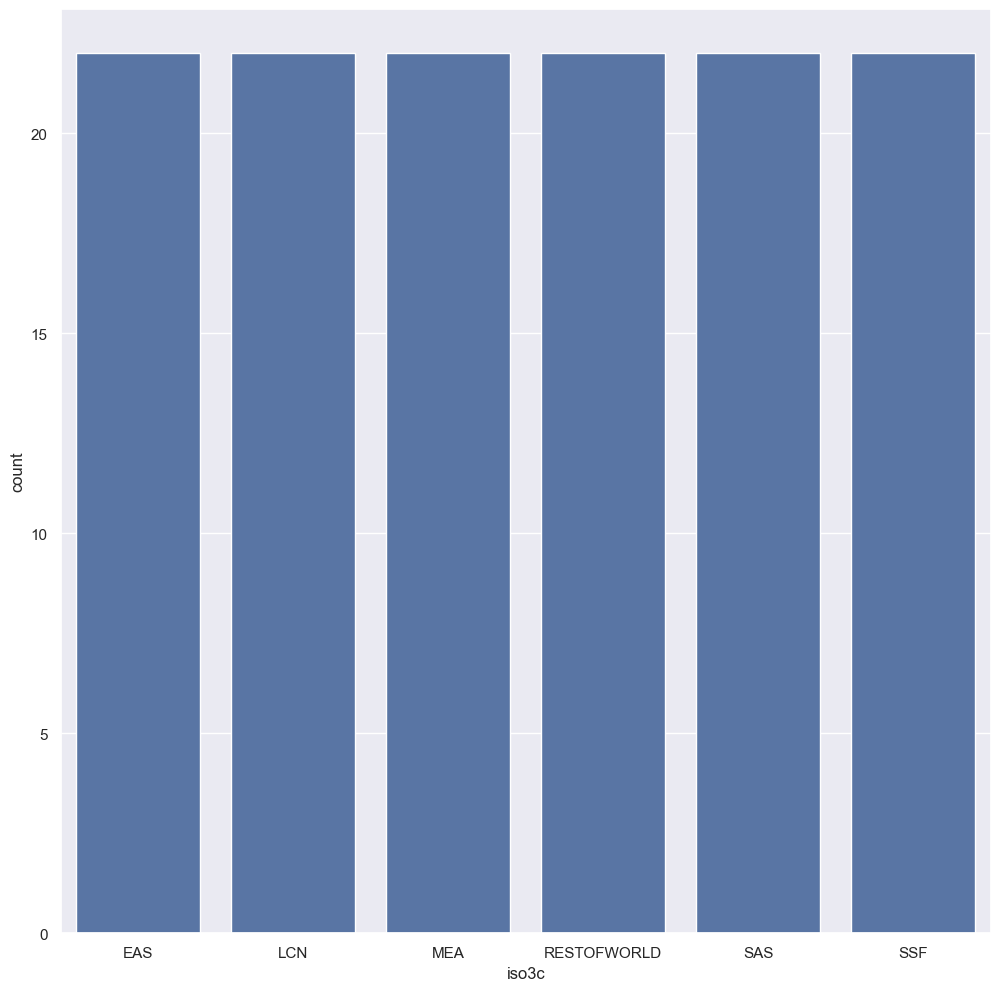

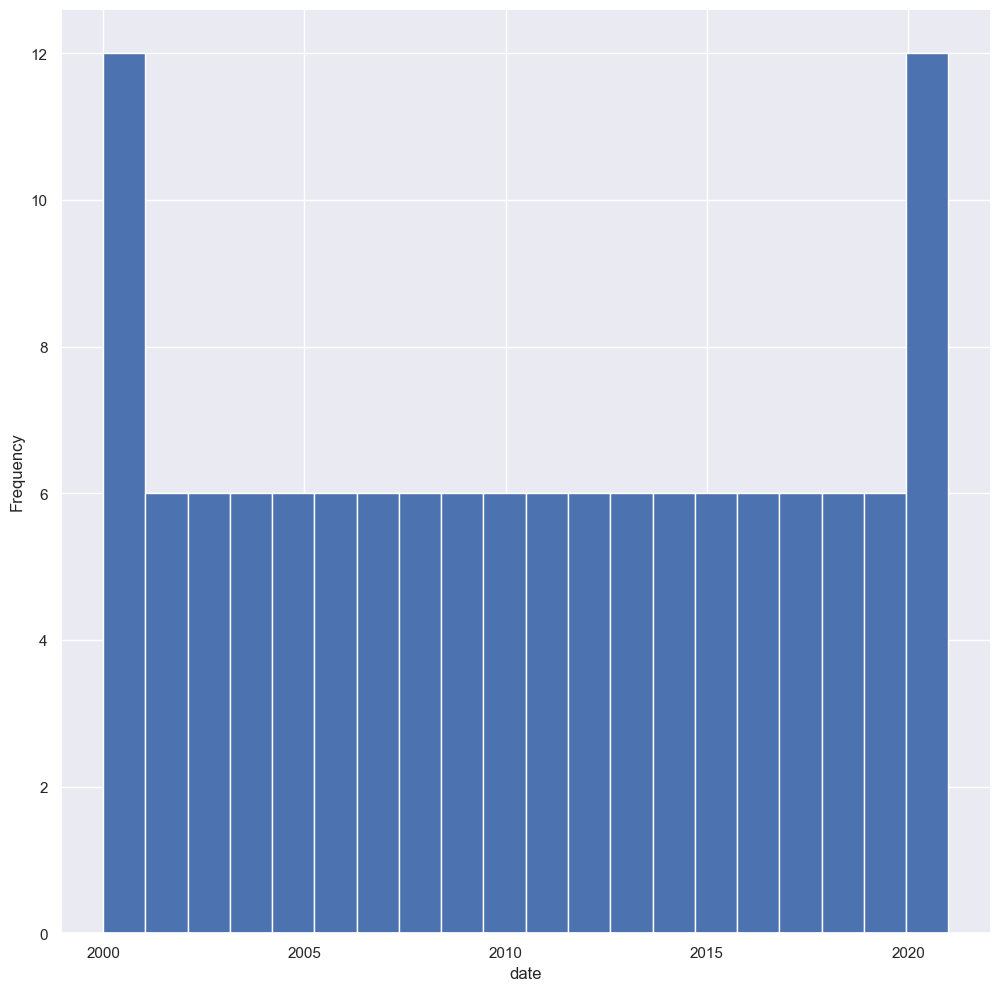

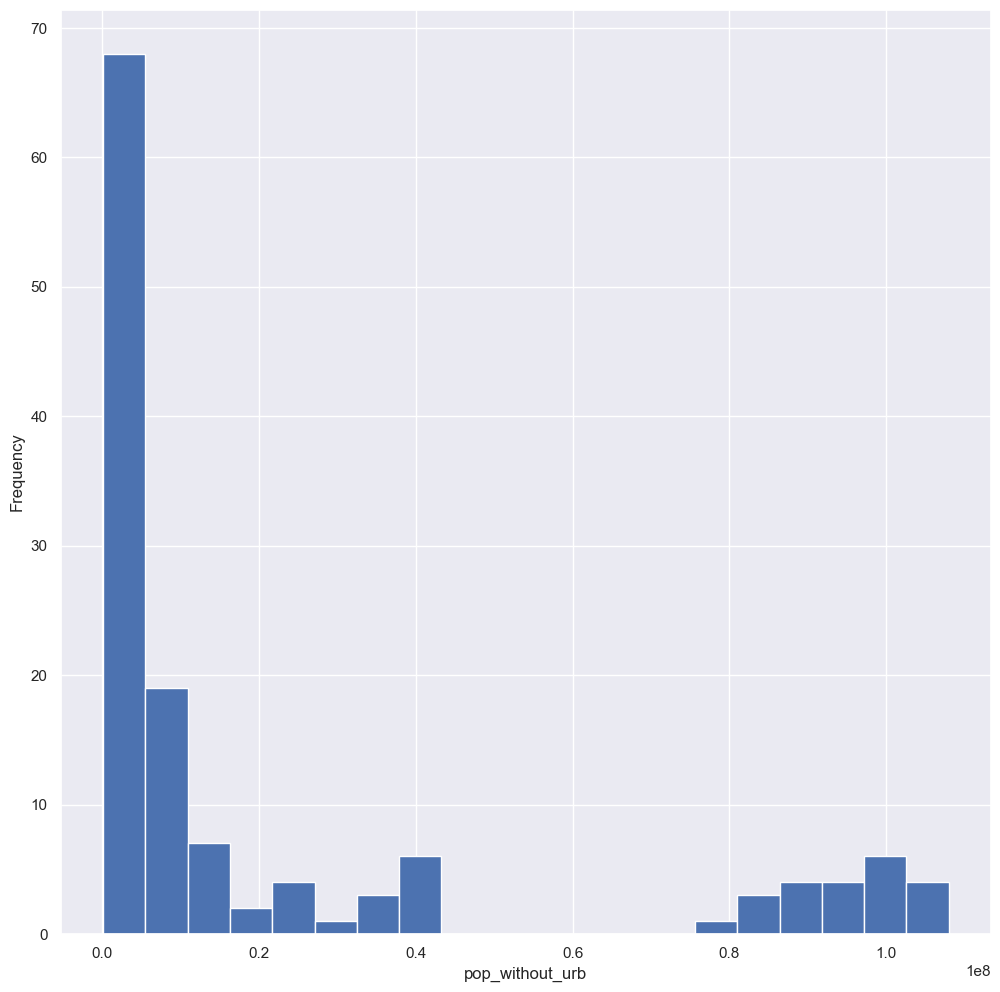

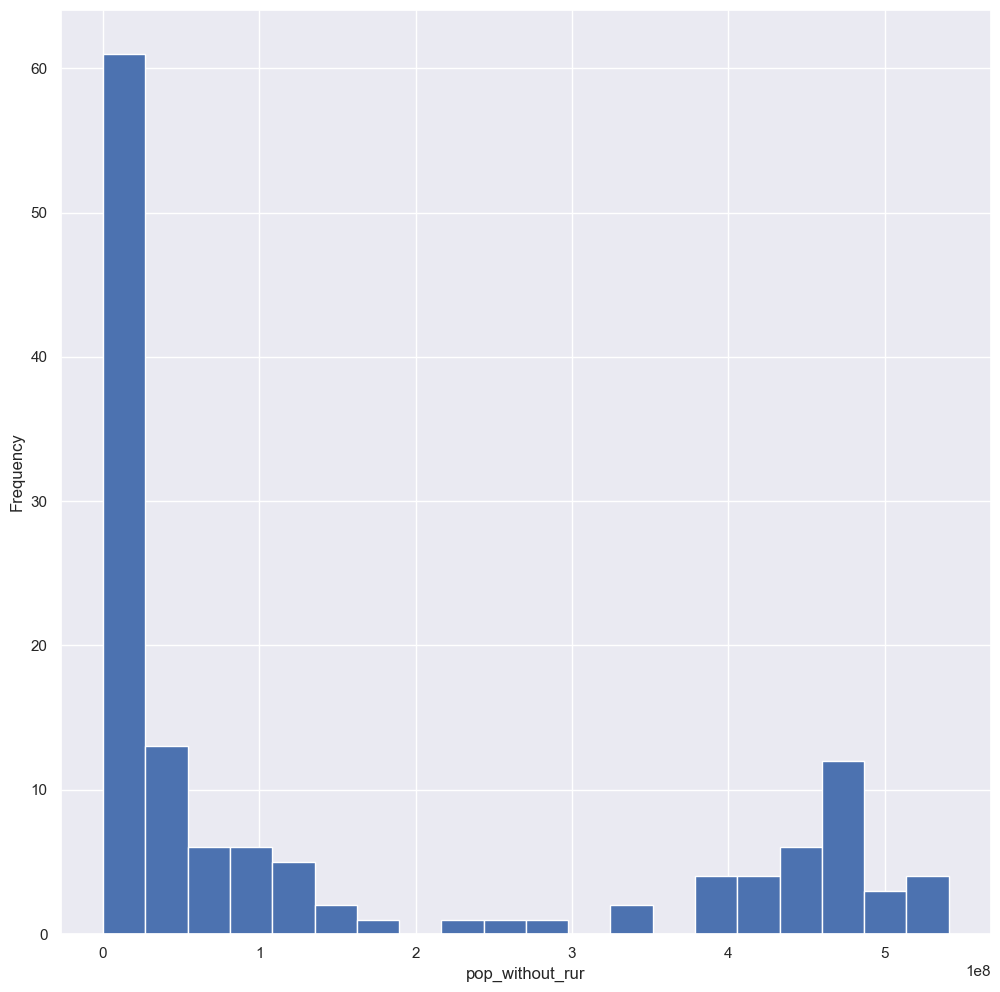

In [24]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

# Data Visualization

## Matplotlib

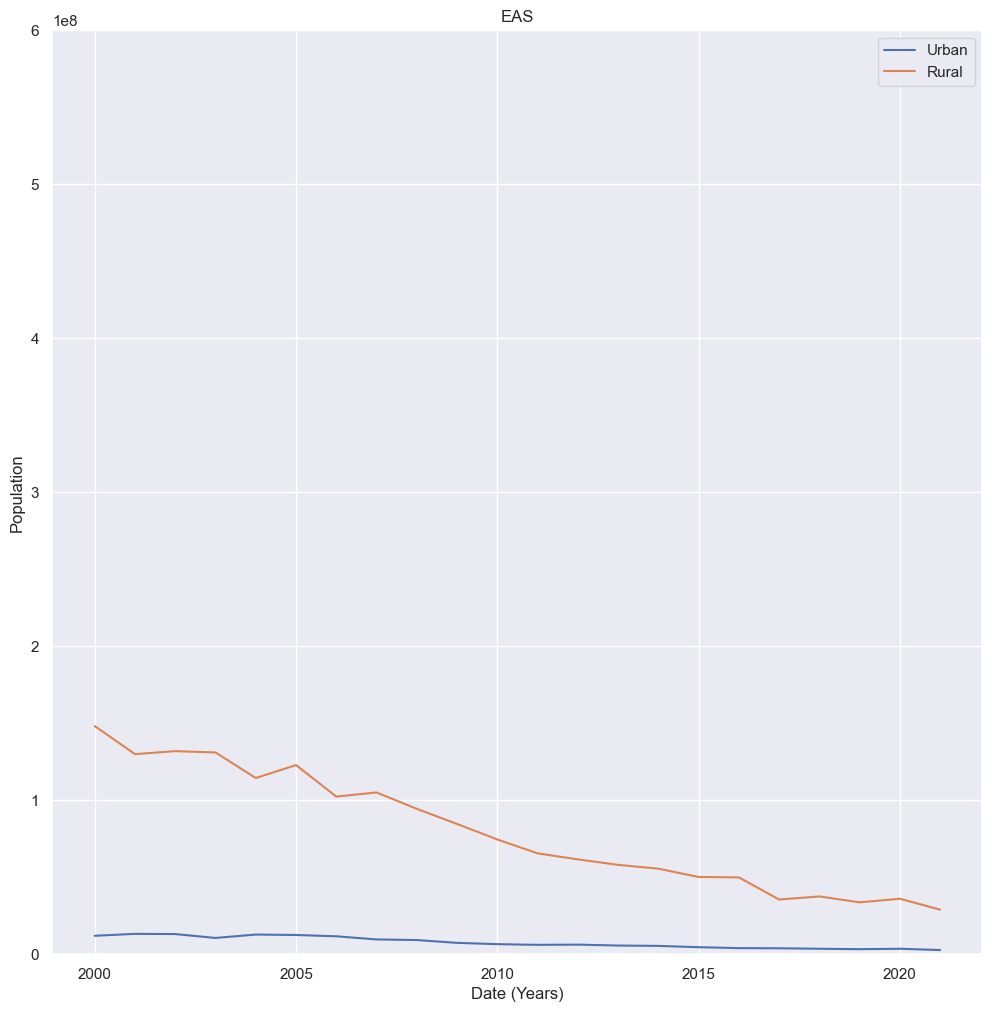

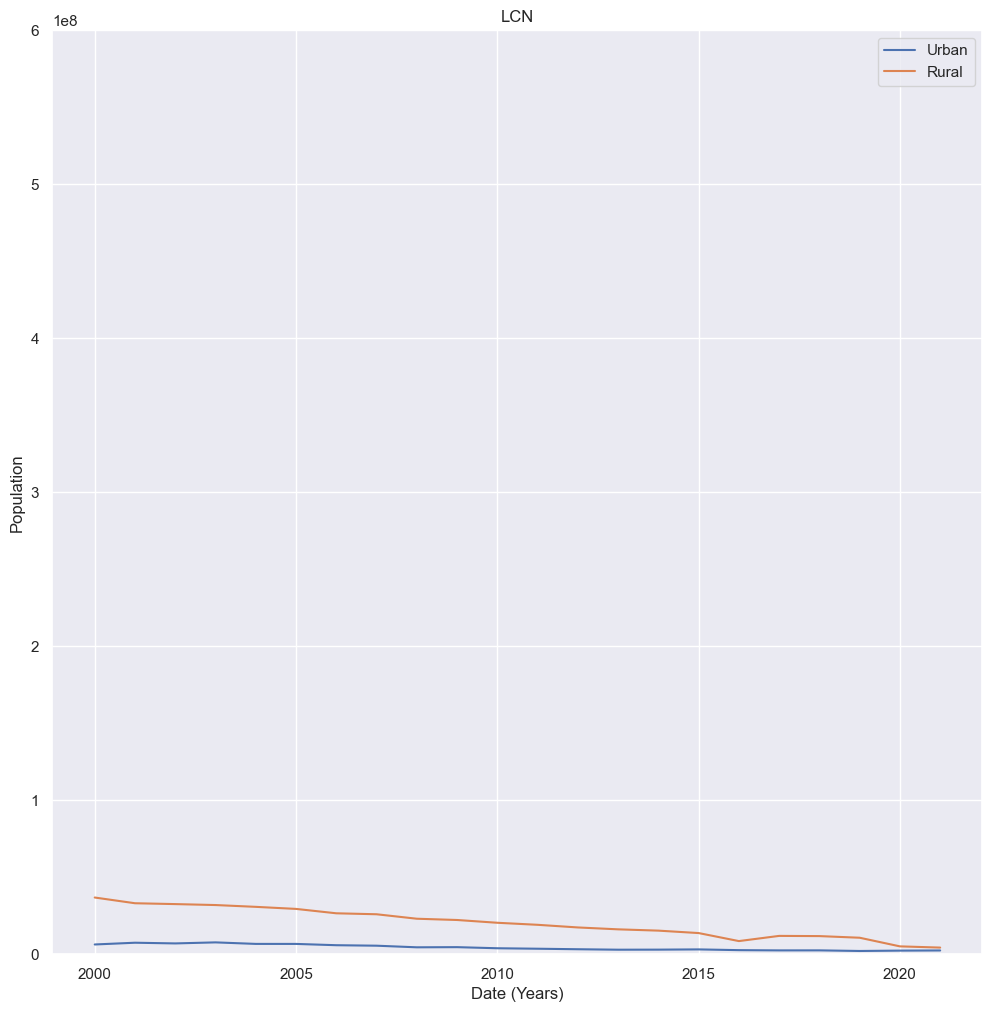

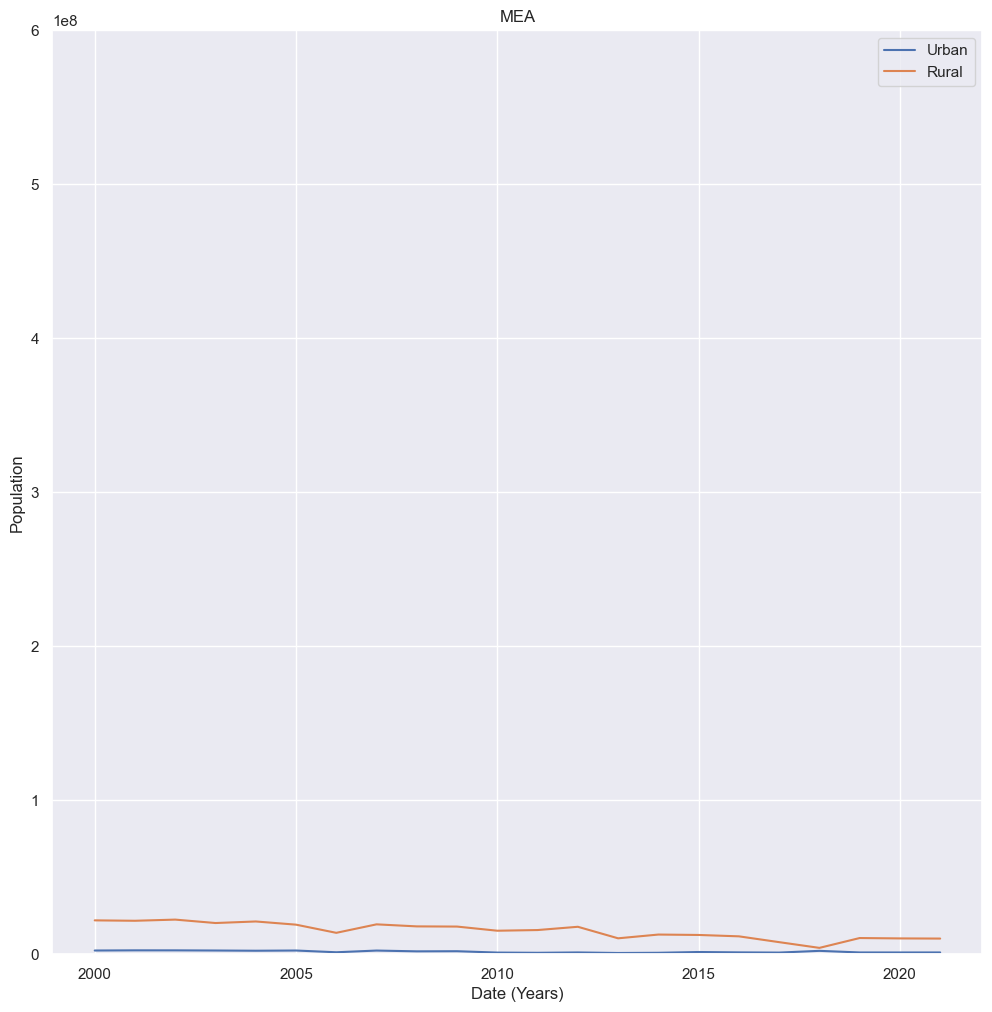

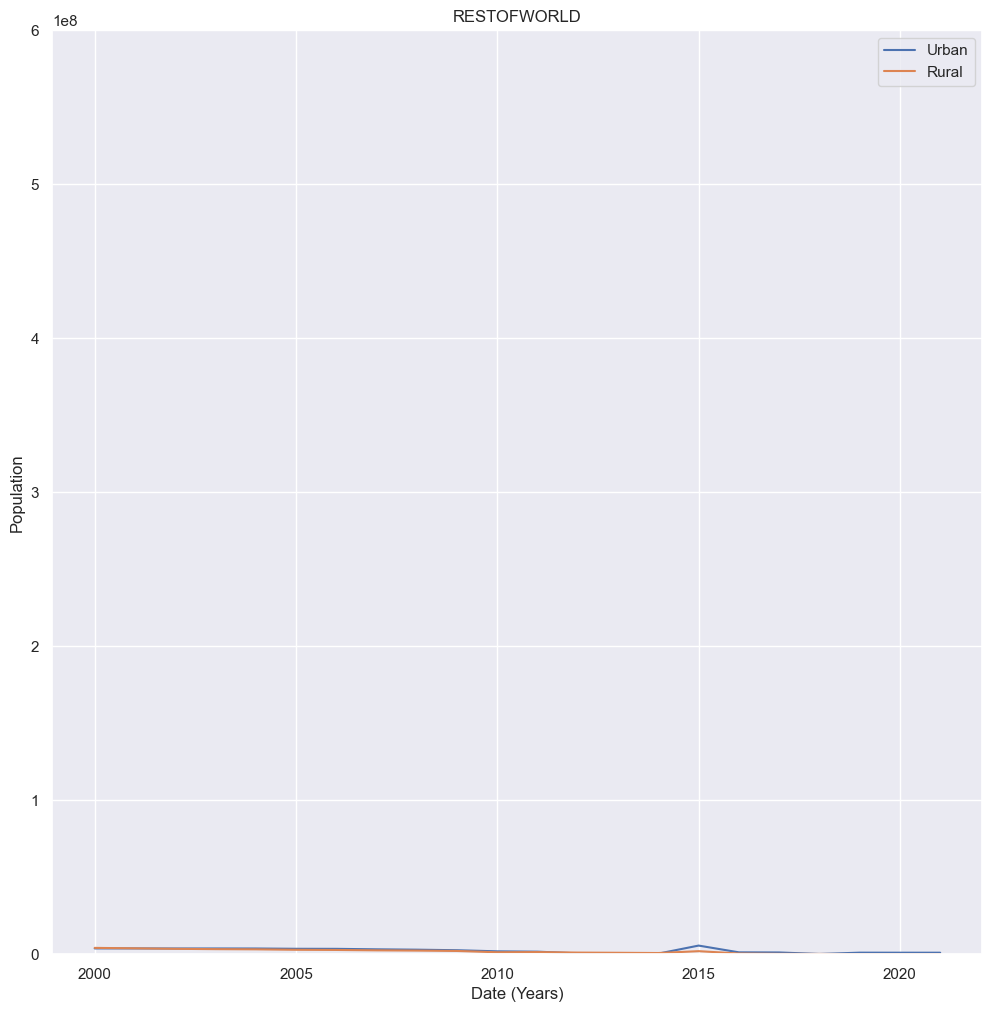

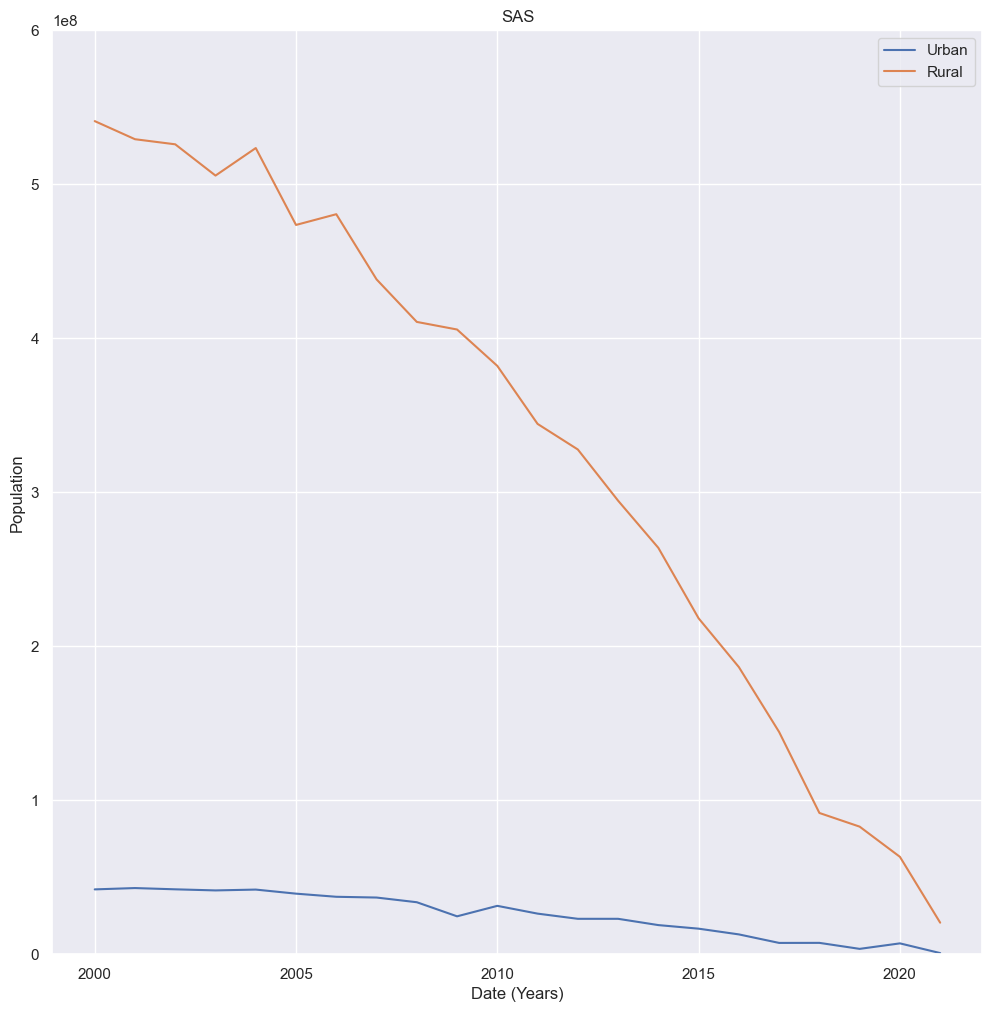

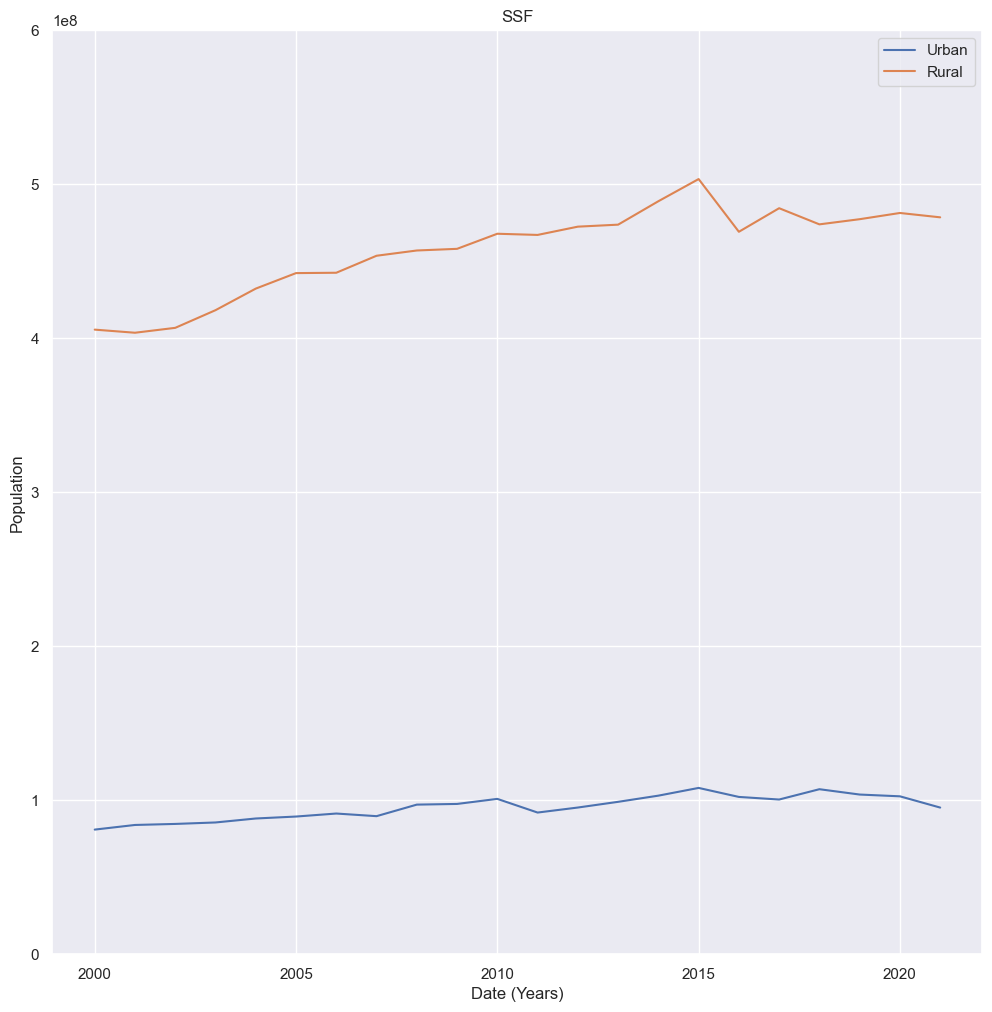

In [25]:
x = [i for i in range(2000, 2022)]
date = df["date"]
urb = df["pop_without_urb"]
rur = df["pop_without_rur"]
iso3c = df["iso3c"]

y_1 = []
y_2 = []

for n in range(len(urb)):

    y_1.append(urb[n])
    y_2.append(rur[n])

    if date[n] == 2021:
        plt.title(iso3c[n])
        plt.ylim(0, 6e8)
        plt.plot(x, y_1, label="Urban")
        plt.plot(x, y_2, label="Rural")
        plt.xlabel("Date (Years)")
        plt.ylabel("Population")
        plt.legend()
        plt.show()
        y_1.clear()
        y_2.clear()


# Değişkenler Arası İlişkiler

- +1: Mükemmel pozitif korelasyon. Bu, bir değişkenin değeri artarken diğer değişkenin de değerinin arttığı anlamına gelir.
-  0: Korelasyon yok veya çok zayıf korelasyon. Bu, değişkenler arasında herhangi bir ilişki olmadığı veya çok zayıf bir ilişki olduğu anlamına gelir.
- -1: Mükemmel negatif korelasyon. Bu, bir değişkenin değeri artarken diğer değişkenin değerinin azaldığı anlamına gelir.

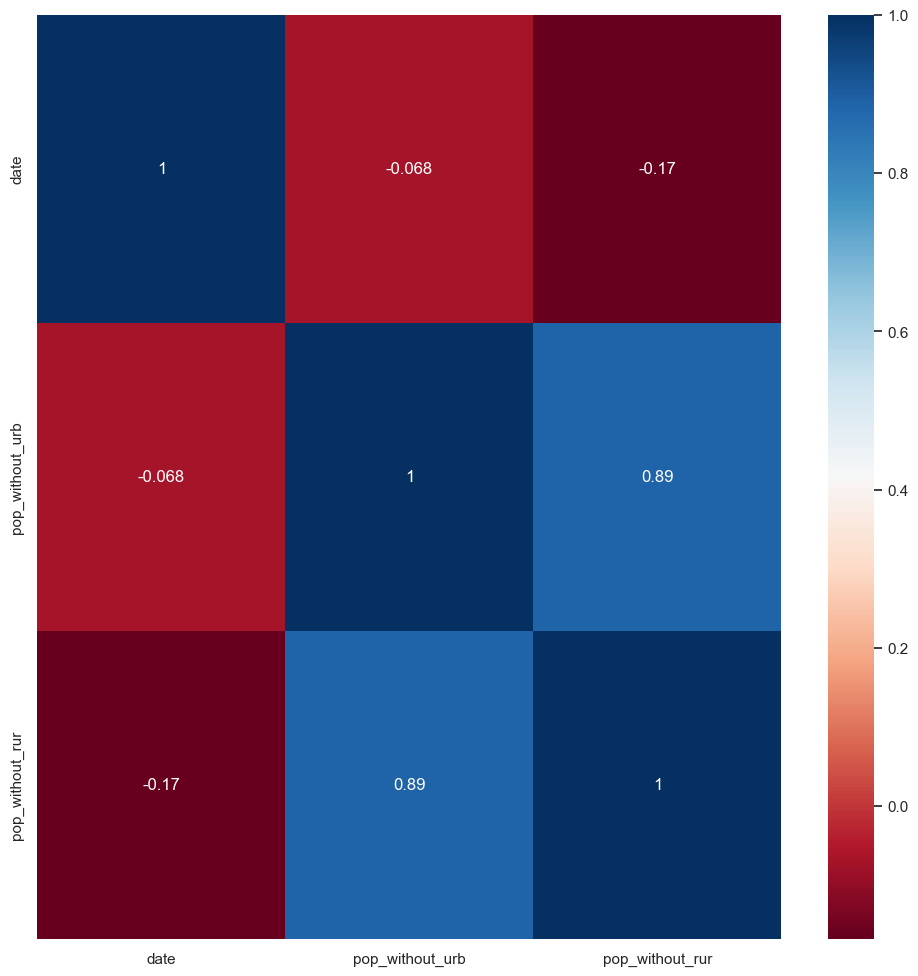

In [26]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

# Feature Engineering

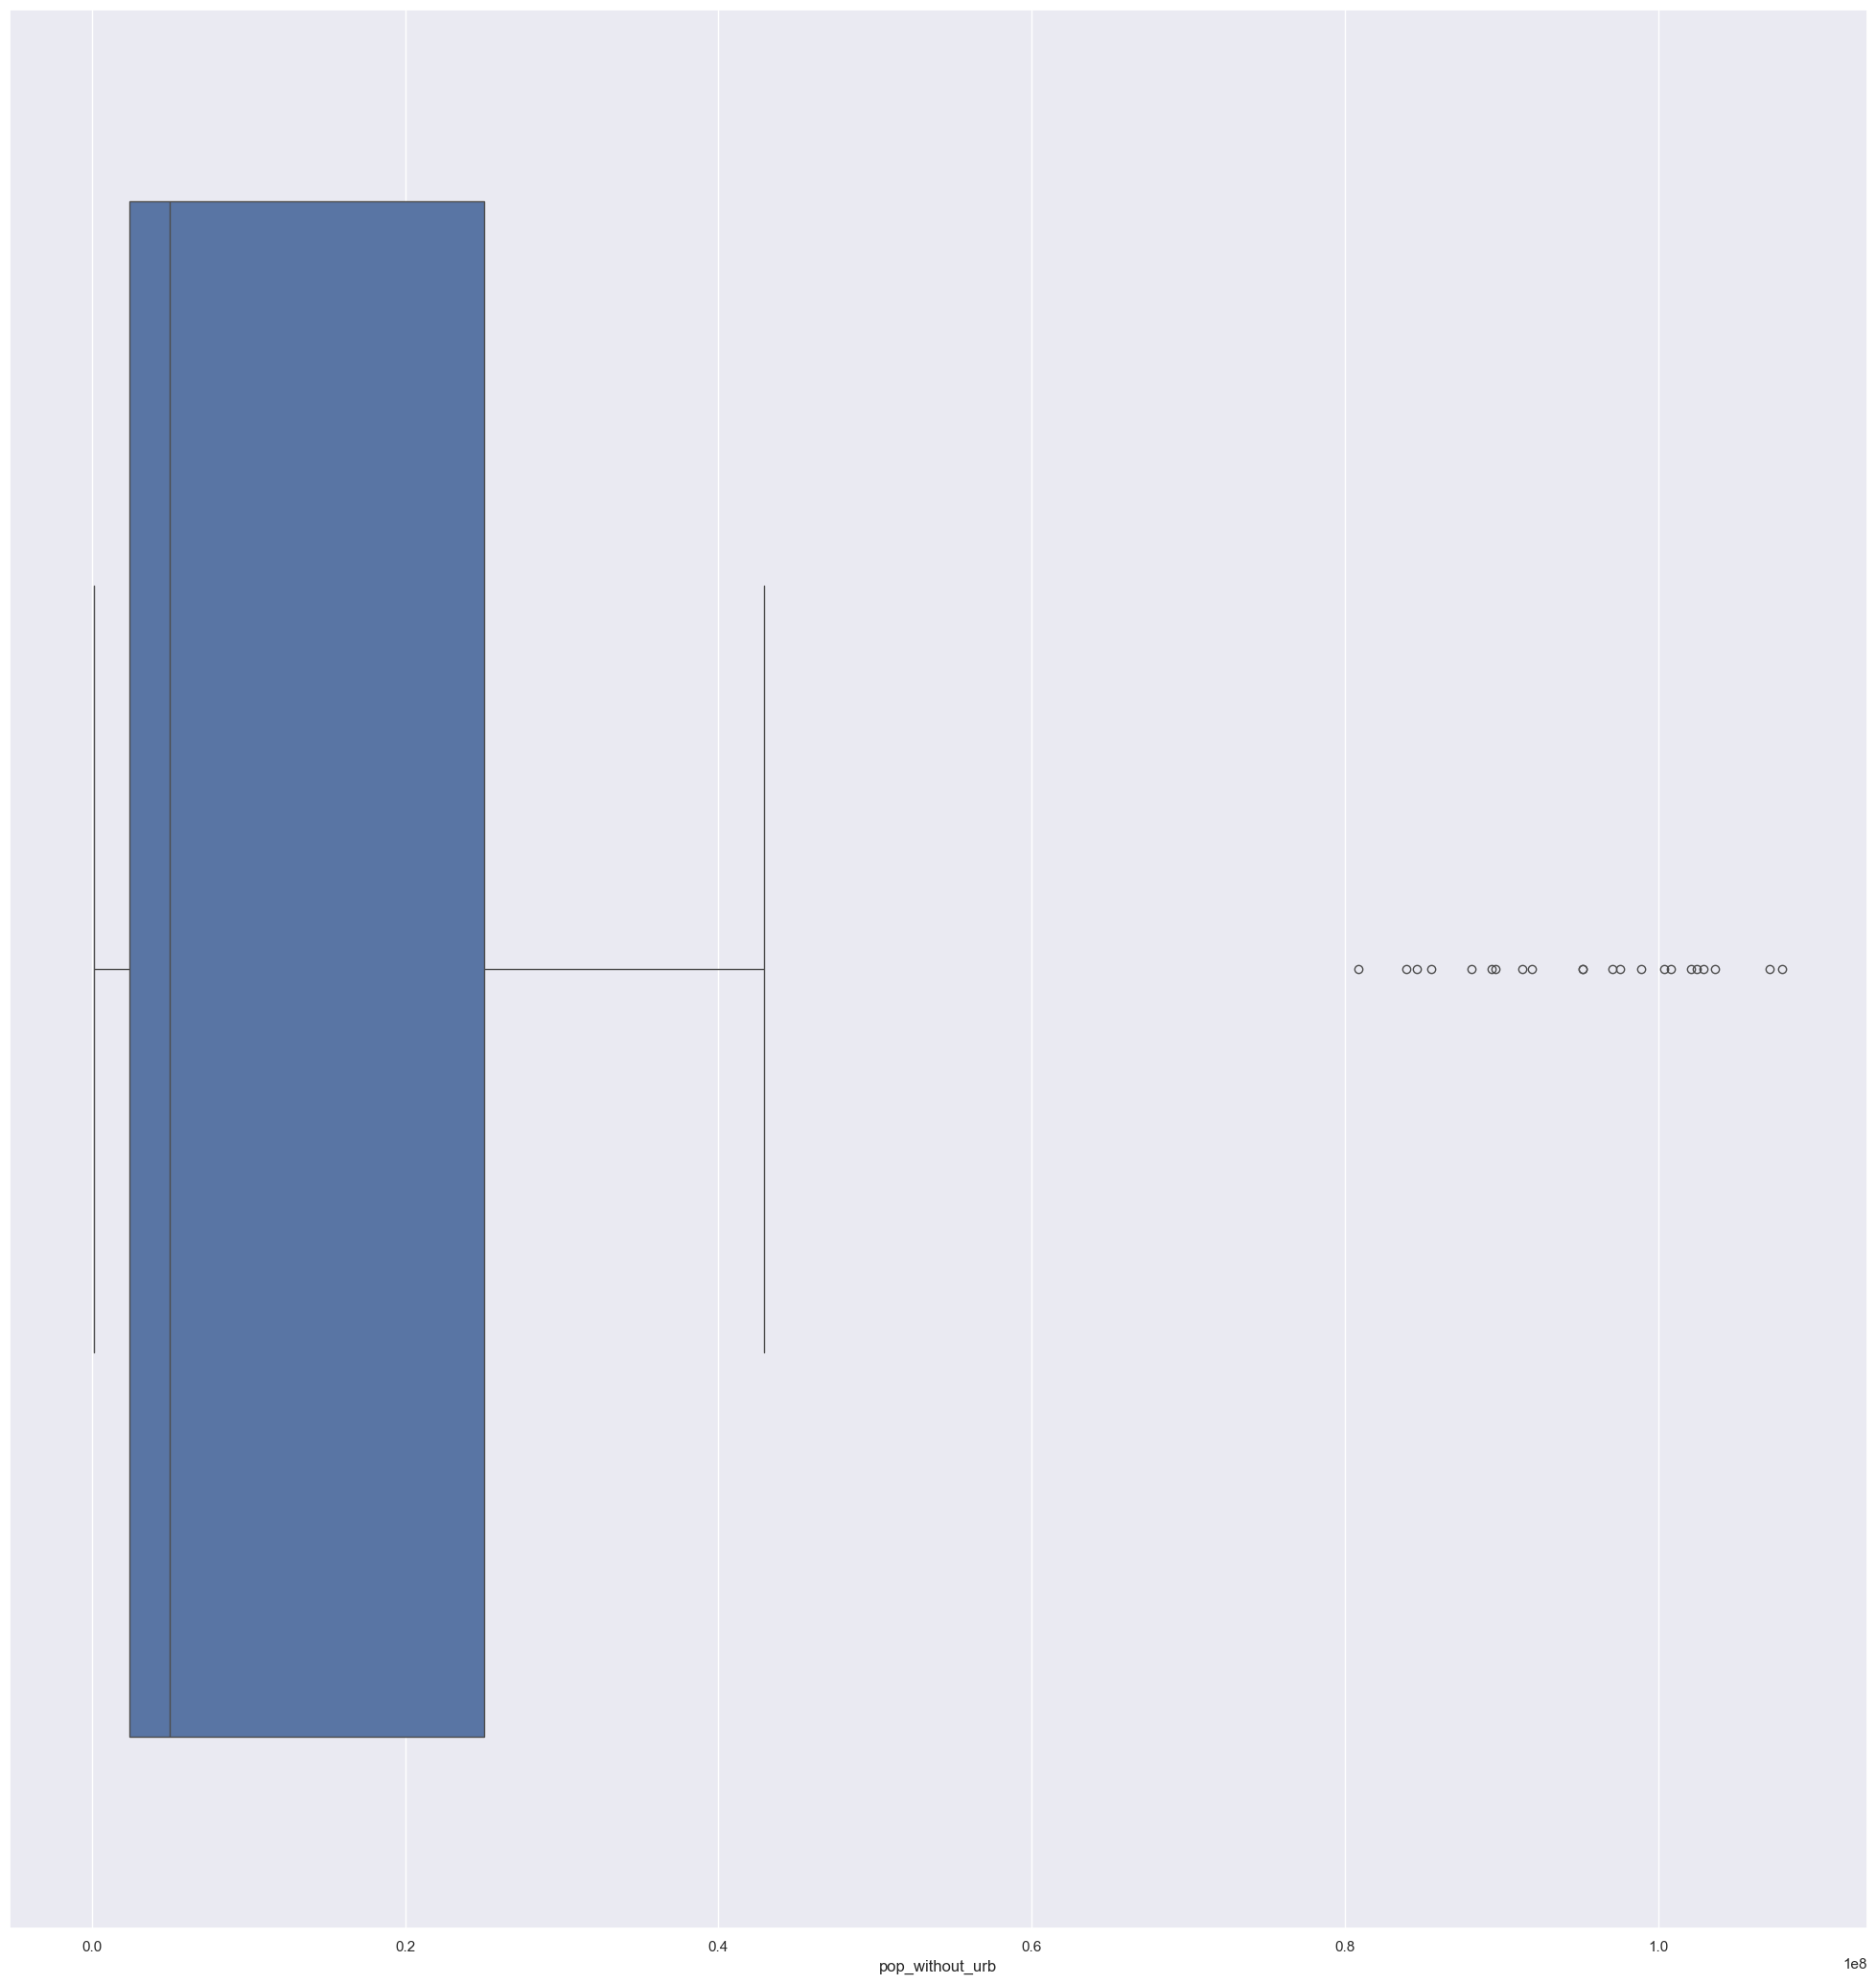

In [27]:
###################
# Grafik Teknikle Aykırı Değerler
###################
plt.figure(figsize=(25,26))
sns.boxplot(x=df["pop_without_urb"])
plt.show(block=True)

In [28]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
outlier_thresholds(df,"pop_without_urb")

(-31582947.875, 58972793.125)

In [30]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [31]:
check_outlier(df,"pop_without_urb")

True

Aykırı Değer Çözümleri

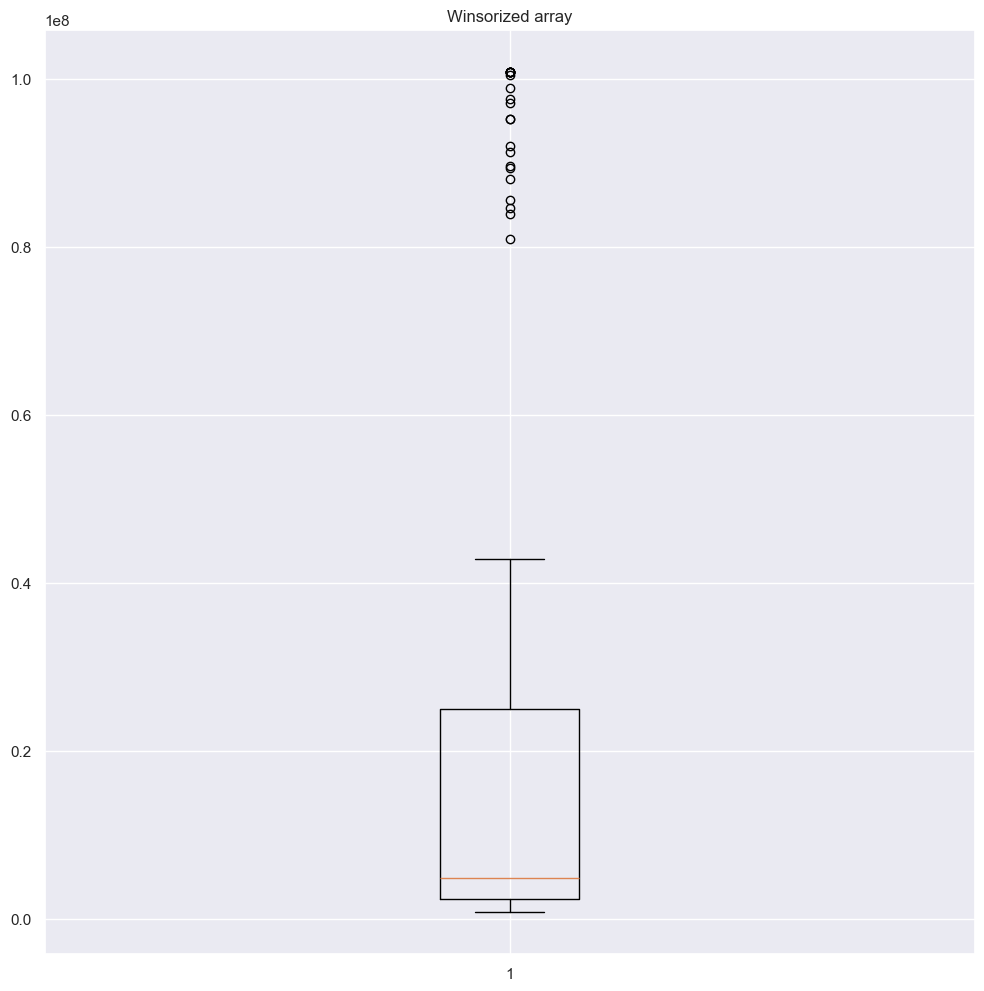

In [32]:
from scipy.stats import mstats
WinsorizedArray = mstats.winsorize(df["pop_without_urb"],(0.05,0.05)) 

plt.boxplot(WinsorizedArray) 
plt.title('Winsorized array') 
plt.show()


Eksik Değerler

In [33]:
df.isnull().sum()

iso3c              0
date               0
pop_without_urb    0
pop_without_rur    0
dtype: int64